## 손실 곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


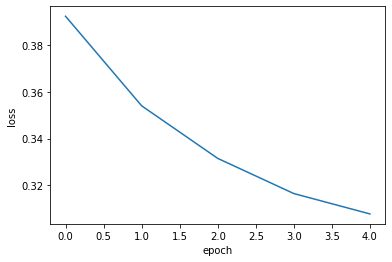

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

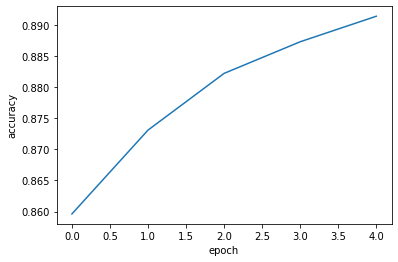

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 에포크 횟수를 20으로 늘려서 모델을 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

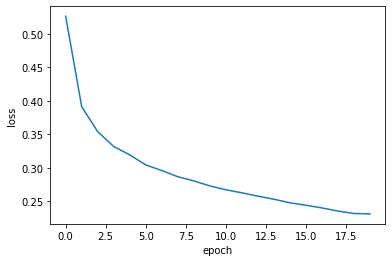

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 epoch 횟수가 증가하면 과대적합이 일어날 수 있다.

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


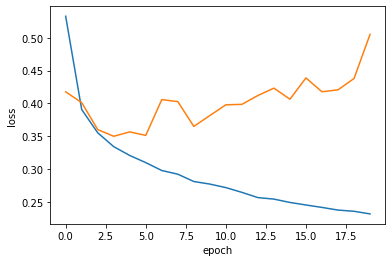

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 초기에 검증 손실이 감소하다가 5번째 epoch를 지나면서 다시 상승하기 시작
- 반면에 훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 형성
- 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것

In [ ]:
# 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5226 - accuracy: 0.8182 - val_loss: 0.4334 - val_accuracy: 0.8466
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4005 - accuracy: 0.8572 - val_loss: 0.4235 - val_accuracy: 0.8492
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3578 - accuracy: 0.8710 - val_loss: 0.3674 - val_accuracy: 0.8689
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8798 - val_loss: 0.3505 - val_accuracy: 0.8755
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3110 - accuracy: 0.8864 - val_loss: 0.3379 - val_accuracy: 0.8783
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2917 - accuracy: 0.8920 - val_loss: 0.3379 - val_accuracy: 0.8799
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2797 - accuracy: 0.8972 - val_loss: 0.3543 - val_accuracy:

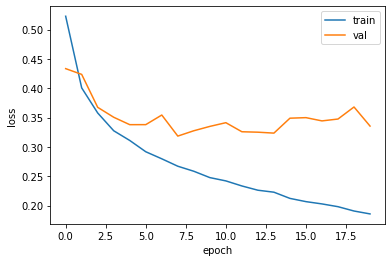

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 과대적합이 훨씬 줄어든 것을 확인할 수 있다.
- 더 나은 손실 곡선을 얻기 위해 추가로 학습률을 조정해 볼 수 있다.

## 드롭아웃
- 일부 노드를 랜덤하게 꺼서(출력을 0으로 만들어) 과대적합을 막는다.
- 얼마나 많은 뉴런을 드롭할지는 직접 설정해야 할 하이퍼파라미터

In [ ]:
model = model_fn(keras.layers.Dropout(0.3)) # 은닉층의 30%를 dropout
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6033 - accuracy: 0.7881 - val_loss: 0.4352 - val_accuracy: 0.8426
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4410 - accuracy: 0.8413 - val_loss: 0.3882 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4060 - accuracy: 0.8534 - val_loss: 0.3743 - val_accuracy: 0.8635
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3827 - accuracy: 0.8597 - val_loss: 0.3579 - val_accuracy: 0.8705
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8655 - val_loss: 0.3563 - val_accuracy: 0.8671
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3568 - accuracy: 0.8691 - val_loss: 0.3338 - val_accuracy: 0.8793
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3430 - accuracy: 0.8726 - val_loss: 0.3343 - val_accuracy:

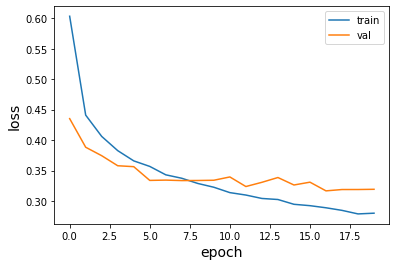

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch' ,fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend(['train', 'val'])
plt.show()

과대적합이 감소한 것을 확인할 수 있다.


## 모델 저장과 복원

In [ ]:
# epoch 횟수를 10으로 재설정 하고 모델을 훈련

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5985 - accuracy: 0.7924 - val_loss: 0.4307 - val_accuracy: 0.8467
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4425 - accuracy: 0.8417 - val_loss: 0.3821 - val_accuracy: 0.8625
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4067 - accuracy: 0.8529 - val_loss: 0.3681 - val_accuracy: 0.8657
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3872 - accuracy: 0.8602 - val_loss: 0.3669 - val_accuracy: 0.8644
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8645 - val_loss: 0.3512 - val_accuracy: 0.8723
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3575 - accuracy: 0.8694 - val_loss: 0.3419 - val_accuracy: 0.8758
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3500 - accuracy: 0.8721 - val_loss: 0.3328 - val_accuracy:

keras 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드를 제공
- 기본적으로 tensorflow의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'인 경우 HDF5 포맷으로 저장

In [ ]:
# 모델의 파라미터를 저장
model.save_weights('model-weight.h5')

In [ ]:
# 모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Feb 16 23:46 model-weight.h5
-rw-r--r-- 1 root root 982664 Feb 16 23:46 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8800833333333333


In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8801


[0.3333797752857208, 0.8800833225250244]

## 콜백
- 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 아래에 있는 클래스들
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, # 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 
                                                  restore_best_weights=True) # restore_best_weight=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5990 - accuracy: 0.7881 - val_loss: 0.4391 - val_accuracy: 0.8430
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4428 - accuracy: 0.8402 - val_loss: 0.3889 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4052 - accuracy: 0.8518 - val_loss: 0.3810 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3877 - accuracy: 0.8570 - val_loss: 0.3808 - val_accuracy: 0.8624
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3680 - accuracy: 0.8652 - val_loss: 0.3495 - val_accuracy: 0.8731
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8697 - val_loss: 0.3426 - val_accuracy: 0.8751
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3476 - accuracy: 0.8726 - val_loss: 0.3339 - val_accuracy:

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


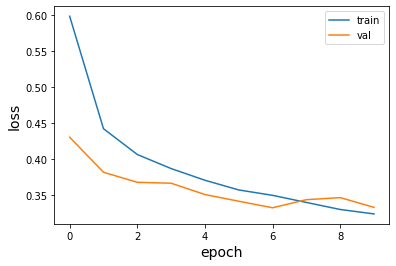

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch' ,fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8790


[0.3338741362094879, 0.8790000081062317]